In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
import seaborn as sns
import pandas as pd

<AxesSubplot:>

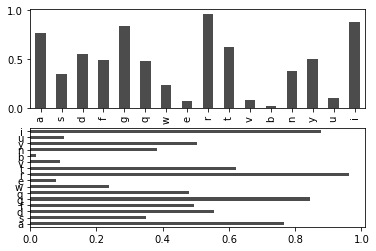

In [10]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('asdfgqwertvbnyui'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)

data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [15]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], 
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [16]:
df

Genus,A,B,C,D
one,0.302874,0.020547,0.450602,0.227299
two,0.349212,0.596293,0.543703,0.301643
three,0.668130,0.097019,0.310191,0.762967
four,0.222906,0.481736,0.227104,0.138486
five,0.913625,0.007428,0.884376,0.596940
six,0.904967,0.990627,0.802913,0.445820


<AxesSubplot:>

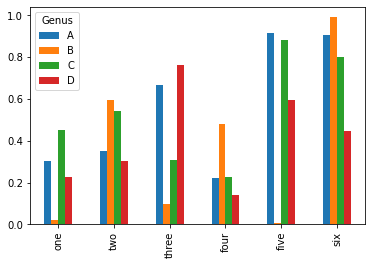

In [17]:
df.plot.bar()

<AxesSubplot:>

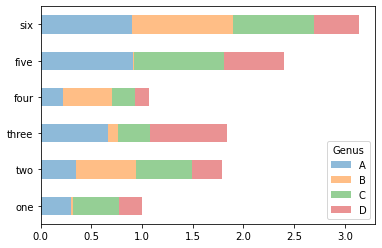

In [18]:
df.plot.barh(stacked=True, alpha=0.5)

In [2]:
tips = pd.read_csv("C:/Users/trivial system/pydata-book-2nd-edition/examples/tips.csv")

In [3]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [4]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [7]:
party_counts = party_counts.loc[:, 2:5]

In [8]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

<AxesSubplot:xlabel='day'>

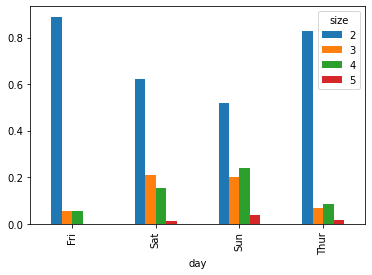

In [9]:
party_pcts.plot.bar()

In [10]:
tips['tips_pct']  = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [11]:
tips.head()

,total_bill,tip,smoker,day,time,size,tips_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tips_pct', ylabel='day'>

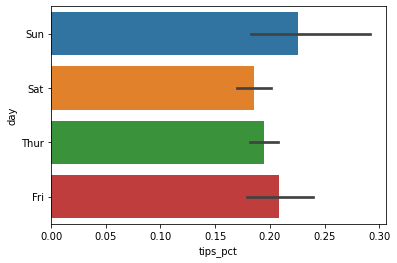

In [13]:
sns.barplot(x='tips_pct', y='day', data=tips, orient='h' )

<AxesSubplot:xlabel='tips_pct', ylabel='day'>

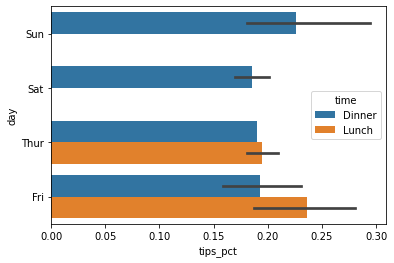

In [14]:
sns.barplot(x='tips_pct', y='day', hue='time', data=tips, orient='h'   )

In [15]:
sns.set(style="whitegrid")

<AxesSubplot:ylabel='Frequency'>

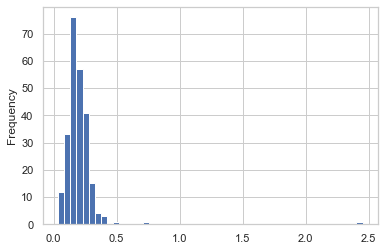

In [16]:
tips['tips_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

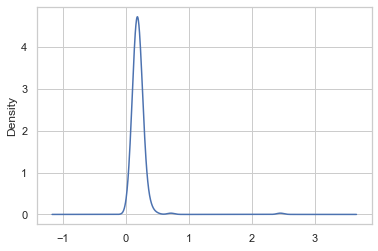

In [18]:
tips['tips_pct'].plot.density()

In [19]:
comp1 = np.random.normal(0, 1, size=200)

In [20]:
comp2 = np.random.normal(10, 2, size=200)

In [21]:
values = pd.Series(np.concatenate([comp1, comp2]))

C:\Users\trivial system\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

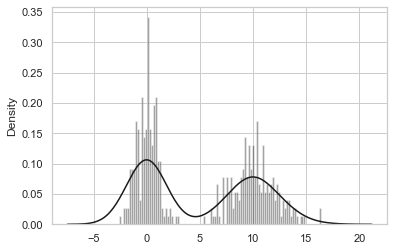

In [22]:
sns.distplot(values, bins=100, color='k')

In [23]:
macro = pd.read_csv("C:/Users/trivial system/pydata-book-2nd-edition/examples/macrodata.csv")

In [24]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [25]:
trans_data = np.log(data).diff().dropna()

In [26]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


C:\Users\trivial system\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 vs log unemp')

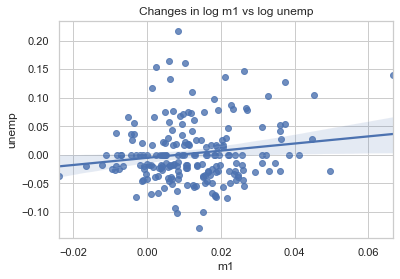

In [29]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s vs log %s' % ('m1', 'unemp'))

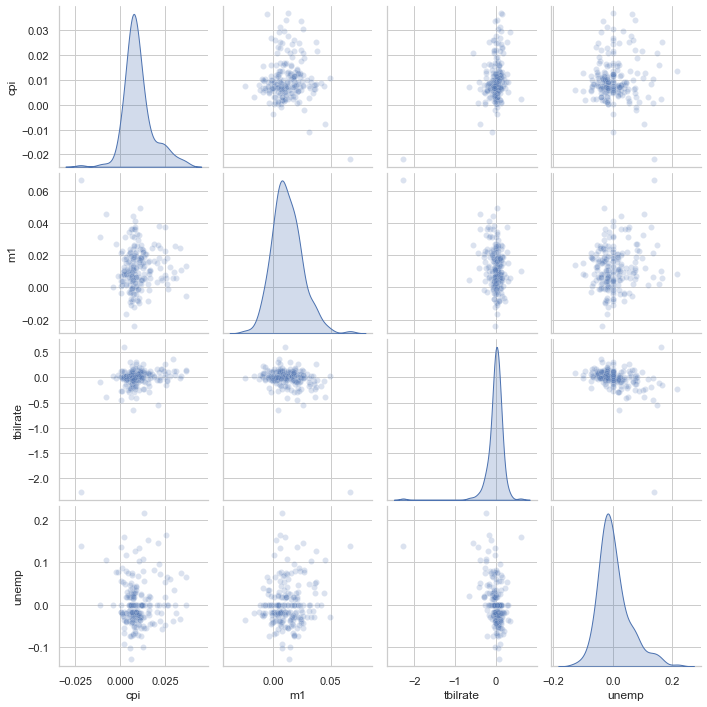

In [30]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha' : 0.2})

C:\Users\trivial system\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\trivial system\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


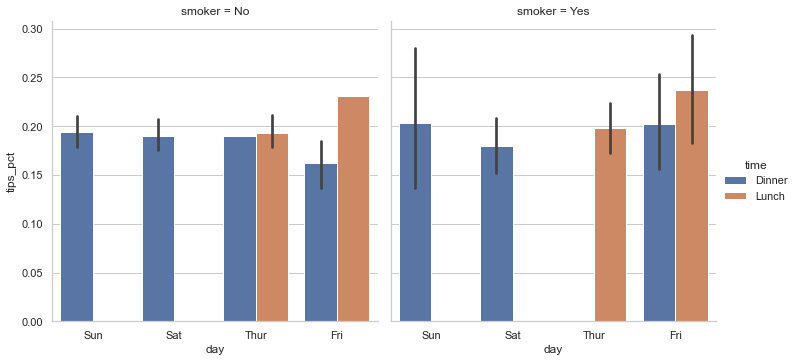

In [38]:
sns.factorplot('day', y='tips_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tips_pct < 1])

C:\Users\trivial system\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


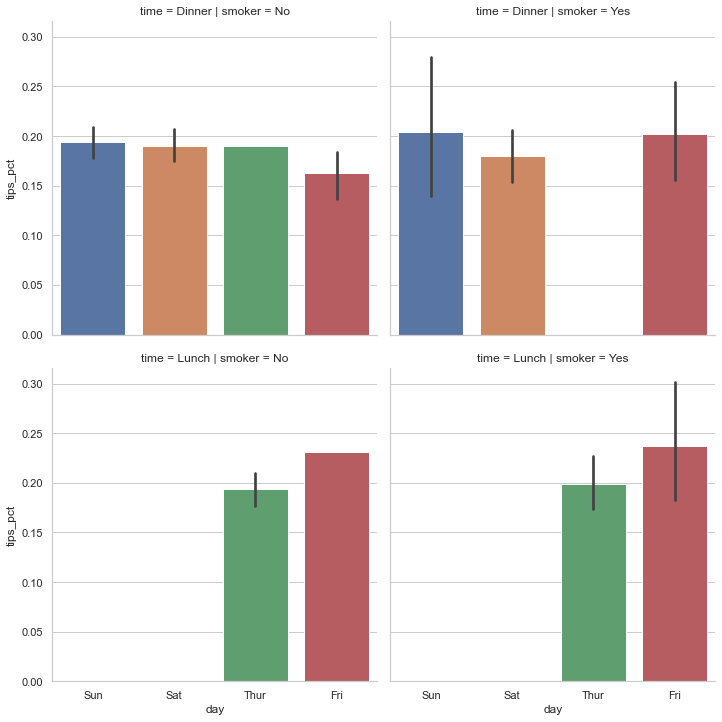

In [39]:
sns.factorplot(x='day', y='tips_pct', row='time', col='smoker', kind='bar', data=tips[tips.tips_pct < 1])

C:\Users\trivial system\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


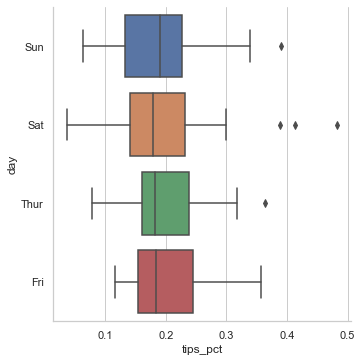

In [41]:
sns.factorplot(x='tips_pct', y='day', kind='box', data=tips[tips.tips_pct < 0.5])